# Operadores de Heysenberg Weyl
$$\left | i \right> → \left | i + a\right> \ \ \ \ \ \ \ \left | i \right> → w^{bi}\left | i \right>$$

Los operadores de Heysenberg Weyl, conformarán en el producto privado las puertas X(a) y Z(b), respectivamente. Estas nos serán útilies para conseguir un estado entrelazado $\varphi_{a'b'}$. Este será teleportado a Charlie el cual conocerá el estado del producto a·b. Sin conocer quienes son a y b. 



## Caso Binario 
### Operador X(a)

$$\left | i \right> → \left | i + a\right>$$

El operador X(a) se genera utilizando una puerta U. Su representación matricial cambia dependiendo del 'a' escogido, ya que se trata de una matriz con la subdiagonal a-esima a 1.

$$U_{a=0} = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right) = I \ \ \ \ \ \ \ U_{a=1} = \left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right) = X$$


Por tanto, tomando los valores: i=0 y a=1. Obtendríamos el siguiente resultado: 
$$U_{a=1}\left|0\right> → \left|0+1\right> = \left|1\right>$$
$$U_{a=1}\left|0\right> = \left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right) · \left(\begin{array}{c} 1 \\ 0 \end{array}\right) = \left(\begin{array}{c} 0 \\ 1 \end{array}\right)$$

In [2]:
from qiskit import *
from funciones.U_function import U_gate
from qiskit.tools.visualization import plot_histogram

dim = 1
a=1
U = U_gate(dim, a)
U


Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

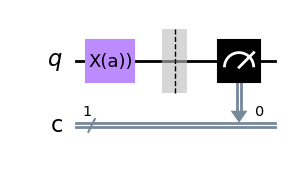

In [3]:
qc = QuantumCircuit(dim,dim)
qc.unitary(U, [0], label="X(a))")
qc.barrier()
qc.measure(0,0)
qc.draw('mpl')

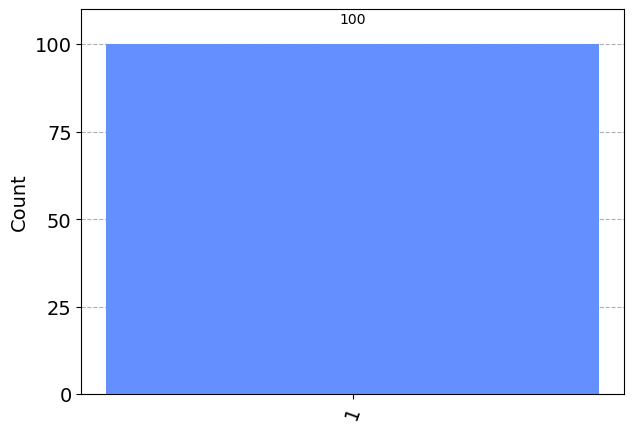

In [15]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 100).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

plot_histogram(cuentas)

## Caso binario 
### Operador Z(b)

$$\left | i \right> → w^{bi}\left | i \right>$$

El operador Z(b) se genera utilizando una puerta R. A diferencia que el operador X(a) con su matriz U, en este caso se utilizará una matriz constante la cual tendrá en su diagonal princial $w^{bi}$ donde i no será un ket sino la fila de la matriz. 

$$R_{b=0} = \left(\begin{array}{cc} w^{0·0} & 0 \\ 0 & w^{0·1} \end{array}\right) = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right) = I \ \ \ \ \ \ R_{b=1} = \left(\begin{array}{cc} w^{1·0} & 0 \\ 0 & w^{1·1} \end{array}\right) = \left(\begin{array}{cc} 1 & 0 \\ 0 & w^{1} \end{array}\right)$$

Cabe destacar que $w = e^{2j\pi/p}$ es una **raíz primitiva** donde p sería la dimensión. Para el caso binario sería $w = e^{2j\pi/2} = e^{j\pi}$

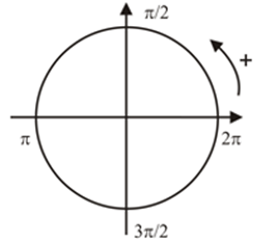

$$R_{b=1} = \left(\begin{array}{cc} w^{1·0} & 0 \\ 0 & w^{1·1} \end{array}\right) = \left(\begin{array}{cc} 1 & 0 \\ 0 & w^{1} \end{array}\right) = \left(\begin{array}{cc} 1 & 0 \\ 0 & e^{j\pi} \end{array}\right) = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array}\right) = Z$$

Por tanto, tomando los valores: i=1 y b=1. Obtendríamos el siguiente resultado:

$$R_{b=1}\left | 1 \right> → w^{i}\left | 1 \right>$$
$$R_{b=1}\left | 1 \right> = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array}\right) · \left(\begin{array}{c} 0 \\ -1 \end{array}\right) = \left(\begin{array}{c} 0 \\ -1 \end{array}\right)$$


In [18]:
from qiskit import *
from funciones.R_function import R_gate
from qiskit.tools.visualization import plot_histogram

dim=1
b=1
p=dim
R = R_gate(dim, b, p)
R

Operator([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j, -1.+1.2246468e-16j]],
         input_dims=(2,), output_dims=(2,))

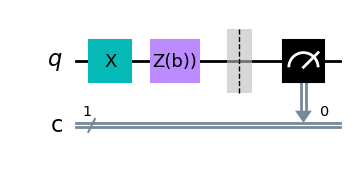

In [19]:
qc = QuantumCircuit(dim,dim)
qc.x(0)
qc.unitary(R, [0], label="Z(b))")
qc.barrier()
qc.measure(0,0)
qc.draw('mpl')

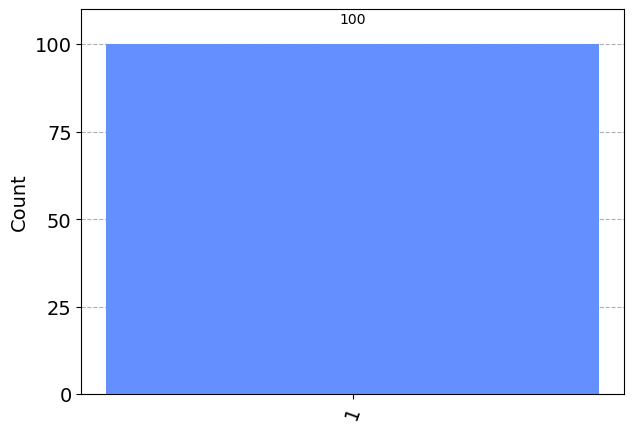

In [17]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 100).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

plot_histogram(cuentas)

## Caso 'n' dimensional
### Operador $X(a):  \left | i \right> → \left | i + a\right>$
Después de conseguir el estado $\left | i\right>$ hay que transformarlo al estado $\left | i + α\right>$, es decir, desplazar el $\left | i\right>$ α posiciones. Para conseguir esto hay que implementar una Puerta U y la mejor forma de entenderla es con un ejemplo: 

Partimos de un $a=3$, $n=6$, $i=0$.

$$ \left | i \right> = \left | 0\right> =\left(\begin{array}{c}1\\0\\0\\0\\0\\0 \end{array}\right) \ \ \ \ \ \ \ \ U_{a} = U_{3} = \left(\begin{array}{cccccc}0&0&0&1&0&0\\0&0&0&0&1&0\\0&0&0&0&0&1\\1&0&0&0&0&0\\0&1&0&0&0&0\\0&0&1&0&0&0 \end{array}\right)$$

Como se puede observar, la puerta $U_{a=3}$, tiene la 3ª subdiagonal a 1 y el resto a 0. Esta matriz consigue realizar el desplazamiento de $α$ dobre $i$ obteniendo el siguiente resultado:

$$U_{a}\left | i \right> = U_{3}\left | 0 \right> = \left(\begin{array}{cccccc}0&0&0&1&0&0\\0&0&0&0&1&0\\0&0&0&0&0&1\\1&0&0&0&0&0\\0&1&0&0&0&0\\0&0&1&0&0&0 \end{array}\right) · \left(\begin{array}{c}1\\0\\0\\0\\0\\0 \end{array}\right) = \left(\begin{array}{c}0\\0\\0\\1\\0\\0 \end{array}\right) = \left | 0 + 3\right> = \left | 3\right>$$


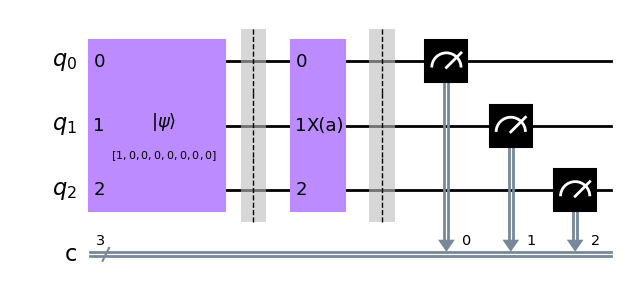

In [20]:
# Importo todo de qiskiy y las funciones .py con las puertas
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.states import Statevector
from funciones.U_function import U_gate

dim=3
a=3

qc = QuantumCircuit(dim, dim)

ket_i = Statevector.from_label('000')
qc.initialize(ket_i.data, [0,1,2])  

qc.barrier()

U = U_gate(dim, a)
qc.unitary(U, [0,1,2], label="X(a)")

qc.barrier()

qc.measure([0,1,2], [0,1,2])

qc.draw('mpl')

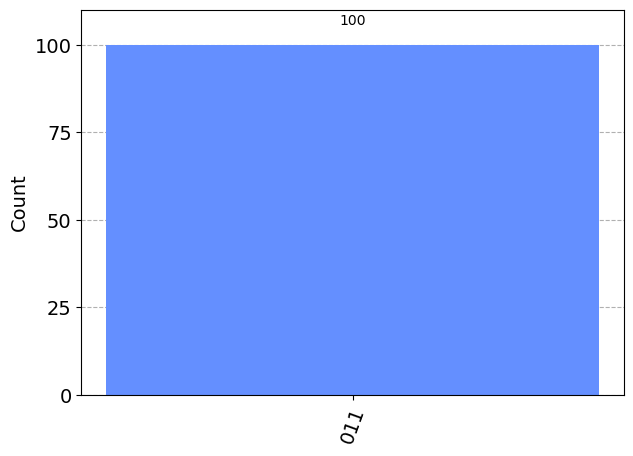

In [21]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 100).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

plot_histogram(cuentas)

## Caso 'n' dimensional
### Operador $Z(b): \left | i \right> → w^{bi}\left | i \right>$

La compuerta R($\phi$) realiza una rotación de un ángulo $\phi$ alrededor del eje-z, donde $\phi$ es un número real.
$$R(\phi) = \left(\begin{array}{cc} 1 & 0 \\ 0 & e^{j\phi} \end{array}\right)\ \ \ \ \left | 0 \right> → e^{\phi j}\left | 0 \right>$$

Para poder crear este operador, es necesario aplicar una matriz R de dimensión $p$ sustituyendo $e$ por la raíz primitiva $w=e^{\frac{2\pi j}{p}}$

Por tanto suponiendo una dimensión $p=5$

$$Z(b) = \left(\begin{array}{ccccc} 1&0&0&0&0 \\ 0&w^{b}&0&0&0 \\ 0&0&w^{2b}&0&0 \\ 0&0&0&w^{3b}&0 \\ 0&0&0&0&w^{4b}\end{array}\right)$$

**Ejemplo:**

Con $b=3$, $p=6$, $\left | i \right> = \left | 0 \right>$

$$\left | i \right> = \left | 0\right> =\left(\begin{array}{c}1\\0\\0\\0\\0\\0 \end{array}\right) \ \ \ \ \ \ \ \ Z(b=3) → Z(3) \left(\begin{array}{cccccc} 1&0&0&0&0&0 \\ 0&w^{3}&0&0&0&0 \\ 0&0&w^{2·3}&0&0&0 \\ 0&0&0&w^{3·3}&0&0 \\ 0&0&0&0&w^{4·3}&0 \\ 0&0&0&0&0&w^{5·3}\end{array}\right)$$

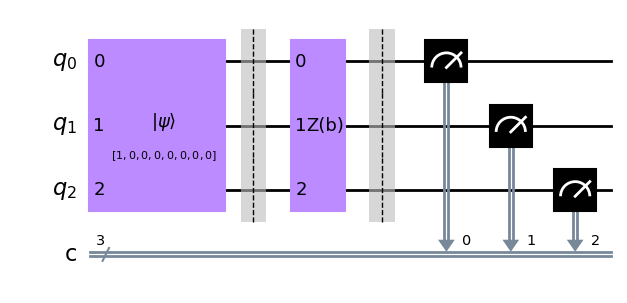

In [22]:
# Importo todo de qiskiy y las funciones .py con las puertas
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.states import Statevector
from funciones.R_function import R_gate

dim=3
b=3
p = 3

qc = QuantumCircuit(dim, dim)

ket_i = Statevector.from_label('000')
qc.initialize(ket_i.data, [0,1,2])  

qc.barrier()

R = R_gate(dim, a, p)
qc.unitary(R, [0,1,2], label="Z(b)")

qc.barrier()

qc.measure([0,1,2], [0,1,2])

qc.draw('mpl')

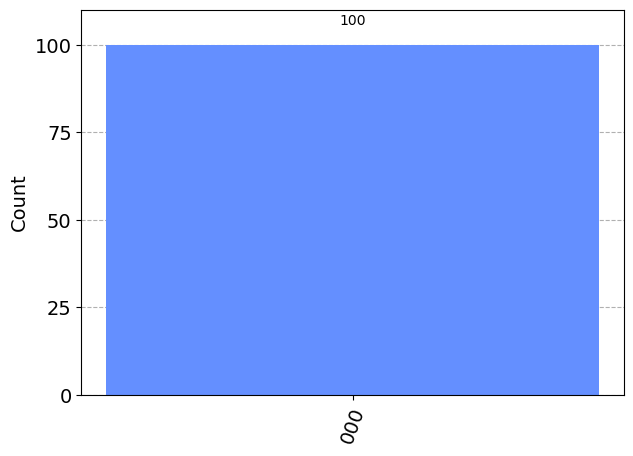

In [23]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 100).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

plot_histogram(cuentas)